# Logistic Regression

You are provided with a dataset available in the Google Drive folder at the following link:
https://drive.google.com/drive/folders/1NB2zIk679jlZC1x0gZPS4ugfHIO1aq1p

The dataset contains information related to social network advertisements, including user attributes such as age and estimated salary, along with a binary target variable indicating whether a user purchased the advertised product or not.

The goal is to build a Logistic Regression classification model to predict whether a user will purchase the advertised product based on their Age and Estimated Salary.

Perform the following tasks:

## Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.inspection import DecisionBoundaryDisplay

## Importing the dataset

In [2]:
data=pd.read_csv("https://drive.google.com/uc?id=15O_mBguwCwBAkjIzo-FHe_C-vtuPEOVG")
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


## Select Features and Target Variable



In [3]:
X=data.iloc[:, 2:4]
y=data.iloc[:, 4]
print(X.head())
print(y.head())
print("X shape:", X.shape)
print("y shape:", y.shape)

   Age  EstimatedSalary
0   19            19000
1   35            20000
2   26            43000
3   27            57000
4   19            76000
0    0
1    0
2    0
3    0
4    0
Name: Purchased, dtype: int64
X shape: (400, 2)
y shape: (400,)


## Splitting the dataset into the Training set and Test set

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

## Feature Scaling

In [5]:
sc=StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
print(X_train.mean(axis=0))
print(X_train.std(axis=0))
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

[1.53950926e-16 1.42108547e-16]
[1. 1.]
X_train shape: (300, 2)
X_test shape: (100, 2)


## Training the Logistic Regression model on the Training set

In [6]:
clf=LogisticRegression(random_state=0)
clf.fit(X_train, y_train)
print(clf.coef_)
print(clf.intercept_)

[[2.07665837 1.11008221]]
[-0.95217247]


## Predicting the Test set results

In [7]:
y_pred=clf.predict(X_test)
clf.predict_proba(X_test)

array([[0.88724662, 0.11275338],
       [0.83320406, 0.16679594],
       [0.80547266, 0.19452734],
       [0.91055238, 0.08944762],
       [0.90251404, 0.09748596],
       [0.99212588, 0.00787412],
       [0.98485118, 0.01514882],
       [0.26785182, 0.73214818],
       [0.99418975, 0.00581025],
       [0.49572395, 0.50427605],
       [0.96394336, 0.03605664],
       [0.97080548, 0.02919452],
       [0.83932842, 0.16067158],
       [0.63038349, 0.36961651],
       [0.98450568, 0.01549432],
       [0.66509089, 0.33490911],
       [0.72014373, 0.27985627],
       [0.9877452 , 0.0122548 ],
       [0.01140279, 0.98859721],
       [0.95797872, 0.04202128],
       [0.91068521, 0.08931479],
       [0.03669369, 0.96330631],
       [0.72299248, 0.27700752],
       [0.11789044, 0.88210956],
       [0.99551006, 0.00448994],
       [0.02705318, 0.97294682],
       [0.92231555, 0.07768445],
       [0.92371094, 0.07628906],
       [0.80658112, 0.19341888],
       [0.84340607, 0.15659393],
       [0.

## Making the Confusion Matrix

In [8]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[65  3]
 [ 8 24]]


## Visualising the Training set results

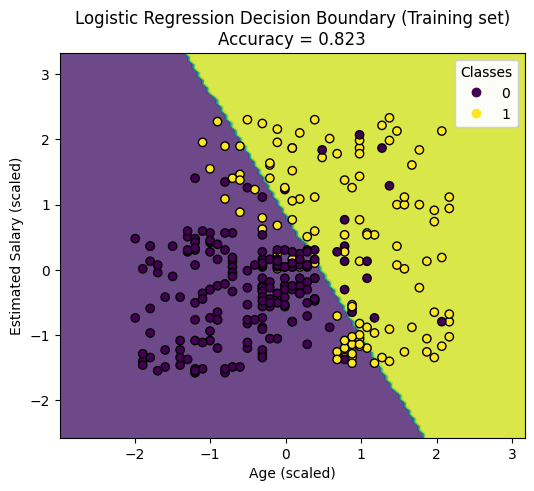

In [9]:
fig, ax = plt.subplots(figsize=(6, 5))
accuracy = accuracy_score(y_train, clf.predict(X_train))
DecisionBoundaryDisplay.from_estimator(clf, X_train, ax=ax, response_method="predict", alpha=0.8)
scatter = ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolor="k")
legend = ax.legend(*scatter.legend_elements(), title="Classes")
ax.add_artist(legend)
ax.set_title(f"Logistic Regression Decision Boundary (Training set)\nAccuracy = {accuracy:.3f}")
ax.set_xlabel("Age (scaled)")
ax.set_ylabel("Estimated Salary (scaled)")
plt.show()

## Visualising the Test set results

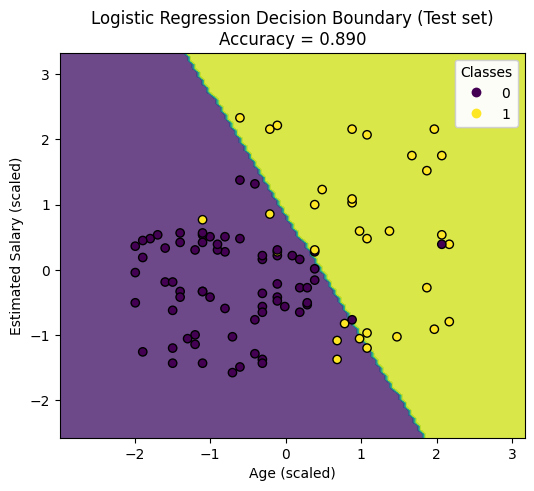

In [10]:
fig, ax = plt.subplots(figsize=(6, 5))
accuracy = accuracy_score(y_test, y_pred)
DecisionBoundaryDisplay.from_estimator(clf, X_test, ax=ax, response_method="predict", alpha=0.8)
scatter = ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolor="k")
legend = ax.legend(*scatter.legend_elements(), title="Classes")
ax.add_artist(legend)
ax.set_title(f"Logistic Regression Decision Boundary (Test set)\nAccuracy = {accuracy:.3f}")
ax.set_xlabel("Age (scaled)")
ax.set_ylabel("Estimated Salary (scaled)")
plt.show()